C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\1118756391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Clasificacion', palette='vlag_r')


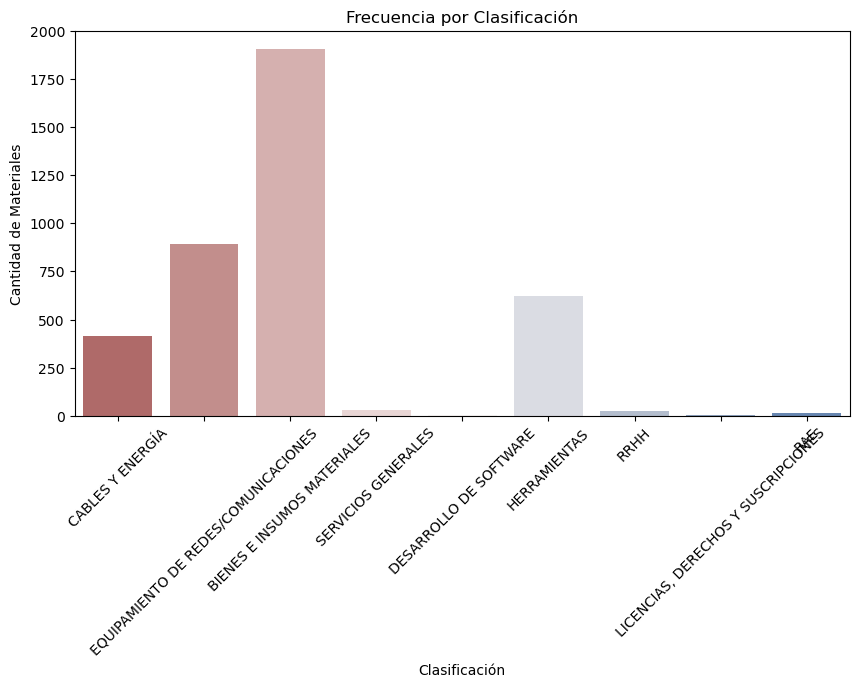

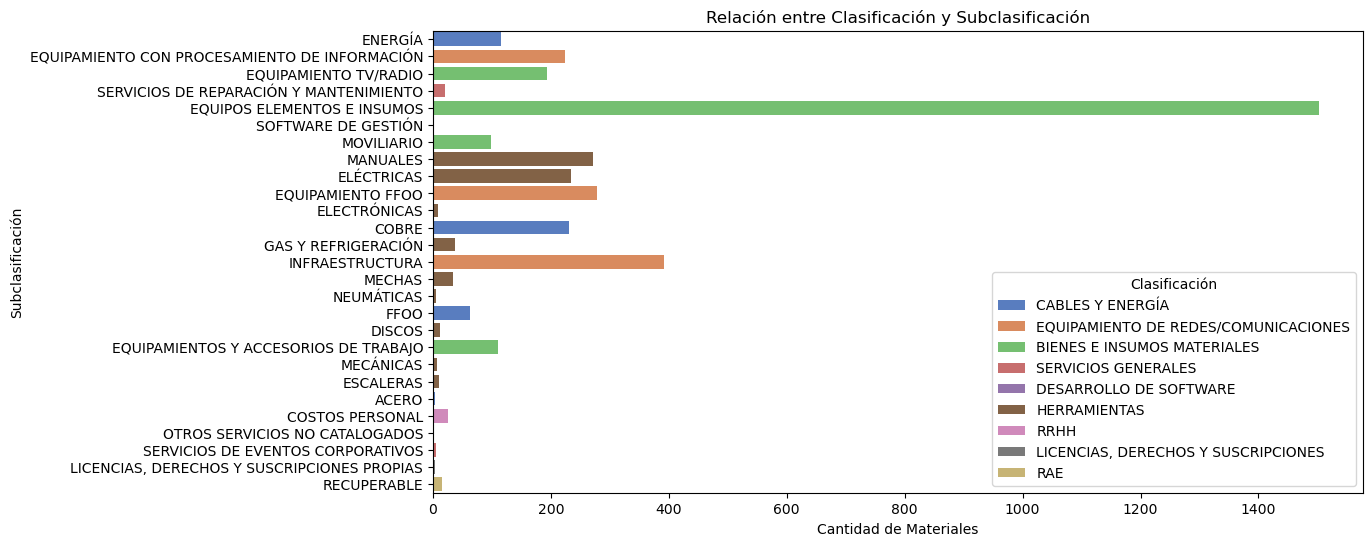

AttributeError: 'Text' object has no property 'labelrotation'

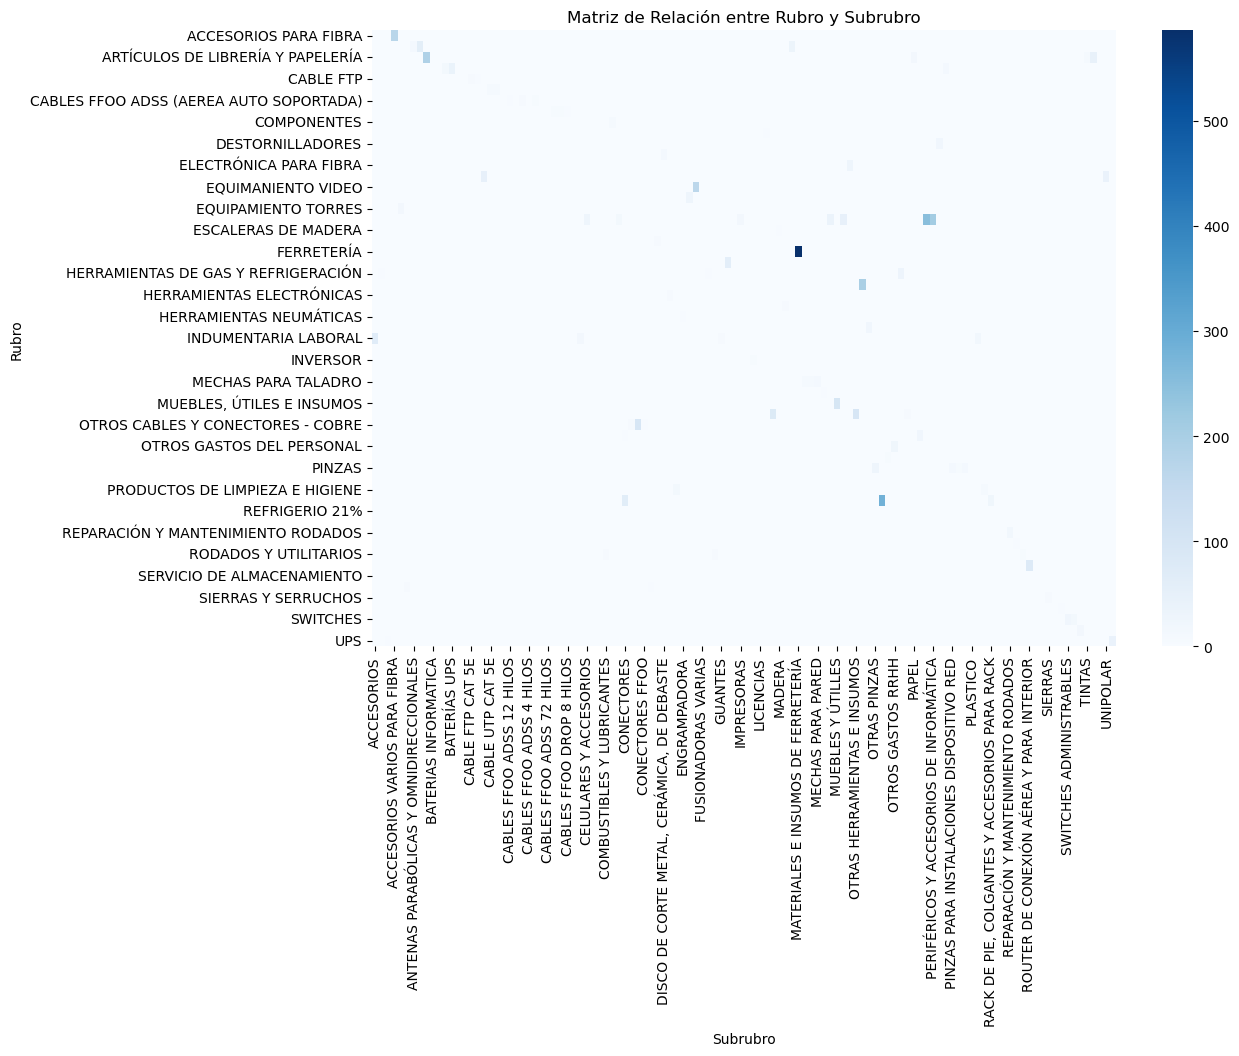

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para mostrar la frecuencia de categorías en "Clasificación"
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Clasificacion', palette='vlag_r')
plt.title('Frecuencia por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de Materiales')
plt.xticks(rotation=45)
plt.show()

# Gráfico jerárquico: relación entre Subclasificación y Clasificación
plt.figure(figsize=(12, 6))
#sns.countplot(data=data, y='Subclasificacion', hue='Clasificacion', palette='muted')
sns.countplot(data=data, y='Subclasificacion', hue='Clasificacion', palette='muted')
plt.title('Relación entre Clasificación y Subclasificación')
plt.xlabel('Cantidad de Materiales')
plt.ylabel('Subclasificación')
plt.legend(title='Clasificación')
plt.show()

# Matriz de calor para analizar relaciones entre Rubro y Subrubro
contingencia = pd.crosstab(data['Rubro'], data['SubRubro'])
plt.figure(figsize=(12, 8))
sns.heatmap(contingencia, cmap='Blues', annot=False, cbar=True,color='Black')
plt.title('Matriz de Relación entre Rubro y Subrubro')
plt.xlabel('Subrubro',labelrotation=45)
plt.ylabel('Rubro')
plt.show()

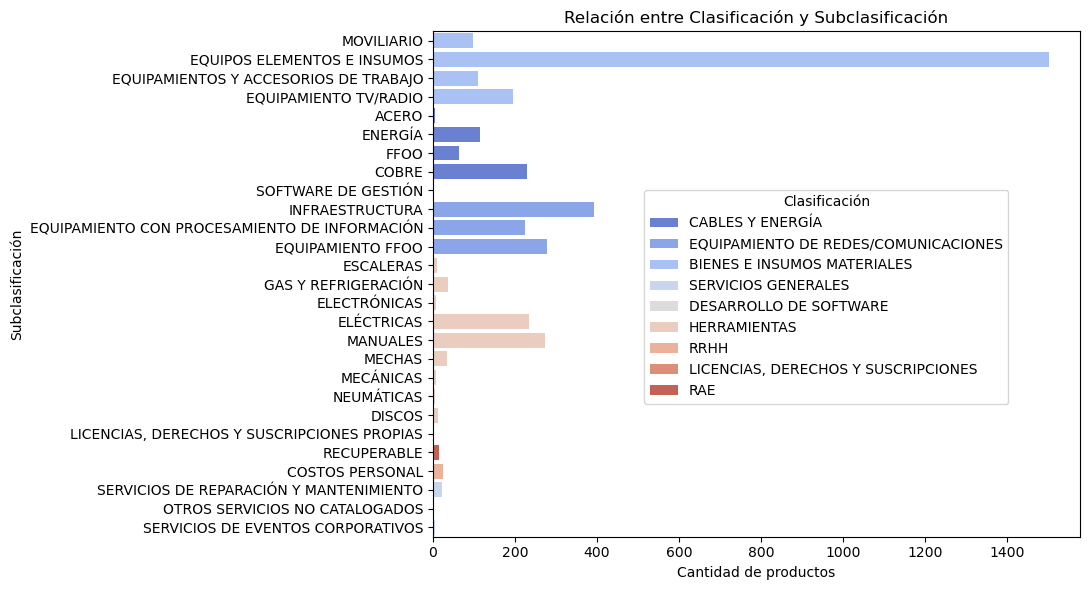

In [102]:
#relación grafica entre CLasificion y SUbclasificacion
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar las subclasificaciones basadas en la clasificación
orden_subclasificacion = data.groupby('Subclasificacion')['Clasificacion'].first().sort_values().index

# Crear el gráfico jerárquico con el eje Y ordenado palette='vlag_a'
plt.figure(figsize=(11, 6))
sns.countplot(data=data, y='Subclasificacion', hue='Clasificacion',order=orden_subclasificacion,palette='coolwarm')  # Ordenamos el eje Y
plt.title('Relación entre Clasificación y Subclasificación')
plt.xlabel('Cantidad de productos')
plt.ylabel('Subclasificación')

plt.legend(title='Clasificación', bbox_to_anchor=(0.9, 0.7), loc='upper right')  # Ajustar posición de la leyendabbox_to_anchor=()
plt.tight_layout()  # Mejorar el espaciado
plt.show()

<Figure size 1200x800 with 0 Axes>

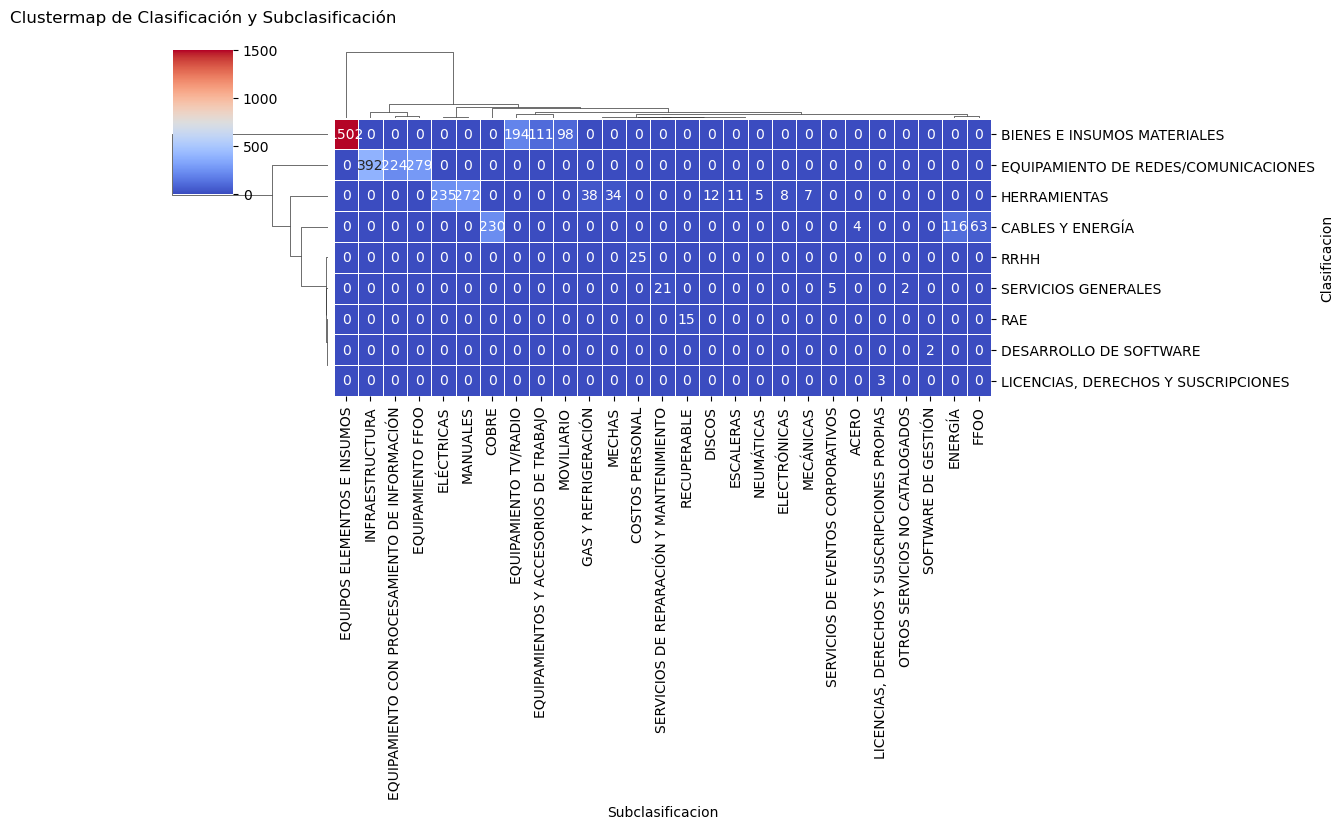

In [96]:
#Clusterpam Clasificación y Subclasificacion
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla cruzada entre Clasificación y Subclasificación
tabla_cruzada = pd.crosstab(data['Clasificacion'], data['Subclasificacion'])

# Crear el clustermap
plt.figure(figsize=(12, 8))
sns.clustermap(tabla_cruzada, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, figsize=(12, 8))

# Personalización
plt.title('Clustermap de Clasificación y Subclasificación', loc='center', pad=20)
plt.show()

AttributeError: 'Text' object has no property 'labelrotation'

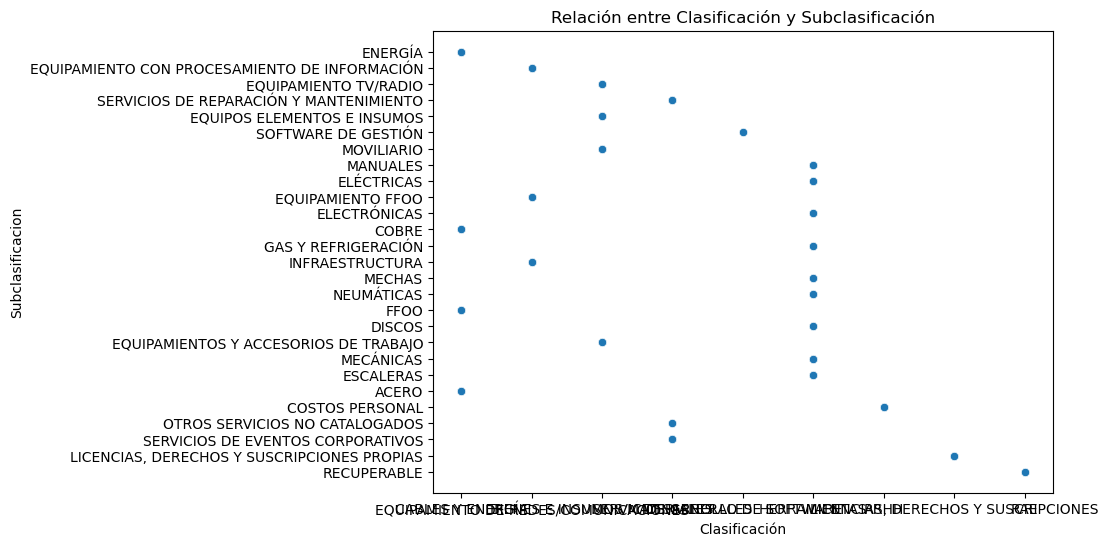

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot para dos variables dependientes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Clasificacion", y="Subclasificacion")
#sns.heatmap(contingencia, cmap='Blues', annot=False, cbar=True)
plt.title("Relación entre Clasificación y Subclasificación")
plt.xlabel("Clasificación")
plt.ylabel("Subclasificacióno")
plt.show()

In [49]:
# Identificar valores nulos
nulos = data.isnull().sum()
nulos_porcentaje = (nulos / len(data)) * 100

# Mostrar resumen de valores nulos
print("Valores nulos por columna:")
print(nulos)
print("\nPorcentaje de valores nulos por columna:")
print(nulos_porcentaje)

# Identificar valores negativos en columnas numéricas
negativos = (data.select_dtypes(include=['number']) < 0).sum()
negativos_porcentaje = (negativos / len(data)) * 100

# Mostrar resumen de valores negativos
print("\nValores negativos por columna:")
print(negativos)
print("\nPorcentaje de valores negativos por columna:")
print(negativos_porcentaje)





Valores nulos por columna:
ProductoCodigo               0
Nombre                       0
ImpuestoId                   0
Impuesto                     0
Descripcion               2375
Activo                       0
CuentaContableCodigo         0
CuentaContable               0
SubRubroCodigo               0
SubRubro                     0
RubroCodigo                  0
Rubro                        0
SubclasificacionCodigo       0
Subclasificacion             0
ClasificacionCodigo          0
Clasificacion                0
UnidadCodigo                 0
Unidad                       0
PrecioVenta               3283
Stock                        0
MovimientosStock           787
MovimientoCantidad         787
ImporteCompra             2695
TieneDescripcion             0
dtype: int64

Porcentaje de valores nulos por columna:
ProductoCodigo             0.000000
Nombre                     0.000000
ImpuestoId                 0.000000
Impuesto                   0.000000
Descripcion               60.7

                       Stock  MovimientosStock  MovimientoCantidad  \
Stock               1.000000          0.003491            0.270186   
MovimientosStock    0.003491          1.000000            0.120049   
MovimientoCantidad  0.270186          0.120049            1.000000   
TieneDescripcion    0.021469          0.052025            0.024283   

                    TieneDescripcion  
Stock                       0.021469  
MovimientosStock            0.052025  
MovimientoCantidad          0.024283  
TieneDescripcion            1.000000  


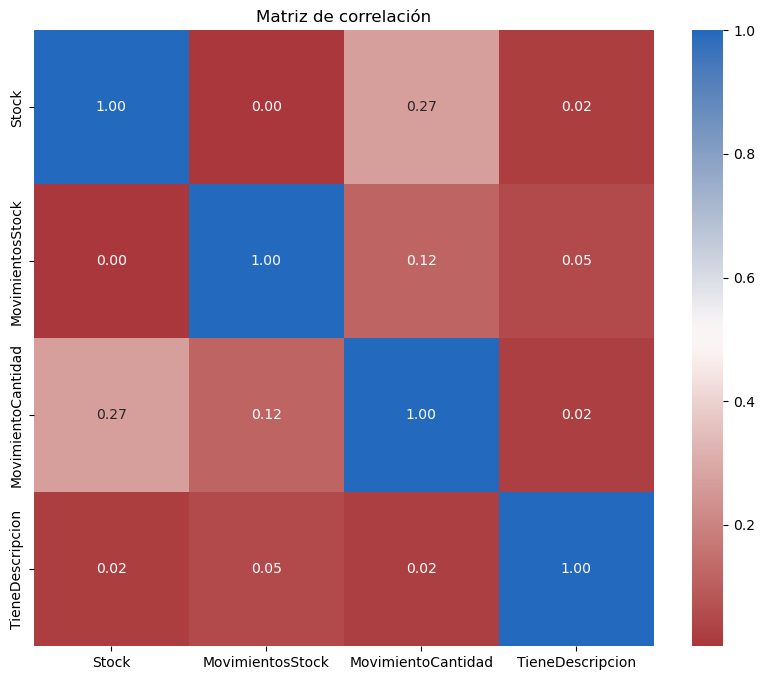

In [14]:
#Vuelvo a calcular la matriz de corre
columnas =  ['Stock','MovimientosStock','MovimientoCantidad','TieneDescripcion']

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data[columnas]
# Calcular la matriz de correlación

corr_matrix = data_seleccionada.corr()

# Imprimir la matriz de correlación
print(corr_matrix)
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag_r', fmt='.2f')#esto agregue que decia mapa de calor
plt.title('Matriz de correlación')
 
plt.show()

In [ ]:
#Como no obtenemos una matriz correlacionada buena trabajamos con las variables 

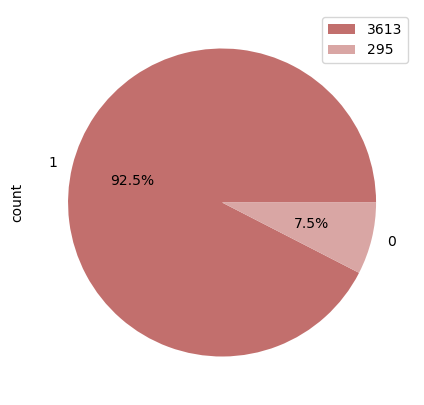

In [30]:
# Se muestra el porcentaje de la muestra para cada una de los dos valores Activo
import seaborn as sns

color=sns.color_palette("vlag_r")
data['Activo'].value_counts().plot(kind='pie',colors=color,autopct='%1.1f%%',figsize=(5,5))
plt.show
varValue = data.Activo.value_counts()
plt.legend(list(varValue))
plt.show()